In [17]:
import keras

Using TensorFlow backend.


In [18]:
from keras.datasets.mnist import load_data

In [33]:
(x_train , y_train) , (x_test , y_test) = load_data()

In [34]:
x_train.shape

(60000, 28, 28)

In [35]:
x_test.shape

(10000, 28, 28)

In [36]:
y_train.shape

(60000,)

In [37]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [38]:
x_train.shape

(60000, 28, 28)

In [39]:
import matplotlib.pyplot as plt

2

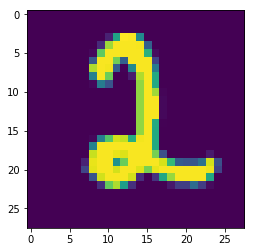

In [41]:
plt.imshow(x_train[8342])
y_train[8342]

# MNIST using MLP

In [42]:
x_train[0].shape

(28, 28)

In [44]:
x_train = x_train.reshape(x_train.shape[0],784)

In [45]:
x_train.shape

(60000, 784)

In [46]:
x_test = x_test.reshape(x_test.shape[0],784)

In [47]:
x_test.shape

(10000, 784)

In [49]:
y_train.shape

(60000,)

In [50]:
y_train[0]

5

In [51]:
# normalising the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

In [52]:
print(x_train[0].max() , x_train[0].min())

1.0 0.0


In [53]:
# normalising into one hot encoder
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [54]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [55]:
y_train[0].argmax()

5

1

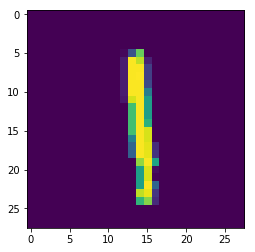

In [57]:
plt.imshow(x_train[8].reshape(28,28))
y_train[8].argmax()

 ### Now creating the model

In [58]:
from keras.layers import Dense , Dropout , Activation
from keras.models import Sequential

In [59]:
model = Sequential()

In [60]:
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [62]:
model.compile(loss='categorical_crossentropy' , optimizer='rmsprop' , metrics=['accuracy'])

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(x_train,y_train,batch_size=1000,epochs=5,verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.4847 - acc: 0.8521 - val_loss: 0.2306 - val_acc: 0.9258
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.1928 - acc: 0.9406 - val_loss: 0.1240 - val_acc: 0.9606
Epoch 3/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.1228 - acc: 0.9623 - val_loss: 0.1159 - val_acc: 0.9637
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0876 - acc: 0.9733 - val_loss: 0.0888 - val_acc: 0.9723
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0656 - acc: 0.9793 - val_loss: 0.0790 - val_acc: 0.9742


In [65]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 106us/step


[0.07902345512004104, 0.9742]

In [66]:
pred = model.predict(x_test)

In [69]:
pred[0].argmax()

7

In [71]:
import numpy as np
np.mean(pred.argmax()==y_test)

0.0

In [73]:
pred.shape

(10000, 10)

In [74]:
y_test.shape

(10000, 10)

In [75]:
pred[7839].argmax()

1

In [77]:
y_test[7839].argmax()

1